 # Linear Regression - Flow

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
flats = pd.read_csv("flats.csv")
flats

,city,floor,size,renovated,balcony.patio,elevator,distance.metro,price
0,Cologne,2,135.588921,Yes,No,No,545.865205,1841.009464
1,Berlin,6,62.803877,Yes,Yes,Yes,575.617524,1036.758496
2,Berlin,6,109.454978,No,No,No,392.897587,1502.613214
3,Munich,1,98.416707,Yes,No,No,506.487093,1346.719862
4,Frankfurt,1,109.179514,Yes,Yes,Yes,768.645354,1599.838934
...,...,...,...,...,...,...,...,...
95,Berlin,4,83.698623,No,Yes,No,845.361532,1222.452091
96,Bochum,2,130.922652,Yes,No,Yes,764.921295,1866.049738
97,Nuremberg,8,106.443521,No,Yes,Yes,595.141191,1536.207455
98,Bochum,1,115.305957,Yes,No,Yes,690.401872,1738.994915


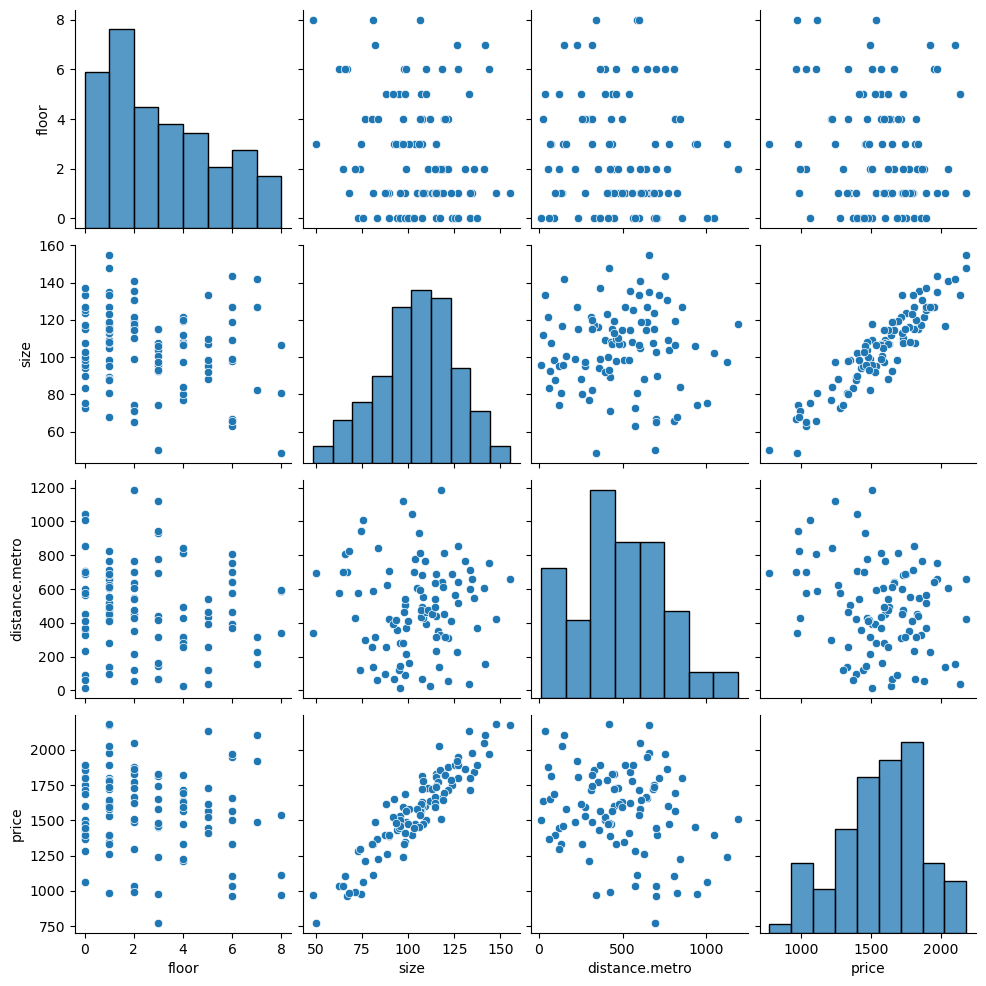

In [3]:
sns.pairplot(flats)

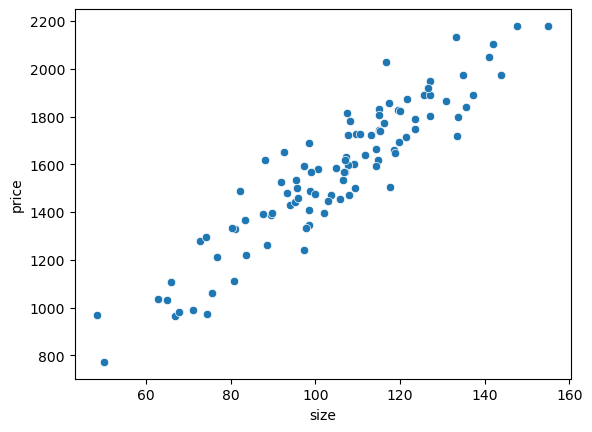

In [4]:
ax = sns.scatterplot(flats, x = "size", y = "price")

## Train-Test-Split (Features & Targets)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
trainset, testset = train_test_split(flats,
                                      test_size = 0.1,
                                      random_state = 42,
                                      shuffle = True)

display(trainset)
display(testset)

,city,floor,size,renovated,balcony.patio,elevator,distance.metro,price
18,Hamburg,3,115.036032,No,Yes,Yes,439.256608,1830.880375
30,Nuremberg,0,125.556547,Yes,Yes,No,564.264890,1891.588432
73,Cologne,1,123.422941,Yes,No,Yes,408.090135,1788.662169
33,Frankfurt,0,127.181293,Yes,No,No,853.549129,1802.853355
90,Munich,0,102.949677,Yes,No,No,700.264755,1445.669601
...,...,...,...,...,...,...,...,...
60,Hamburg,2,110.515394,Yes,No,Yes,474.000383,1725.970689
71,Berlin,5,133.228478,No,Yes,Yes,36.659641,2131.224740
14,Berlin,1,134.851207,Yes,No,Yes,656.622938,1973.531413
92,Cologne,1,114.385204,Yes,No,No,495.229469,1594.010134


,city,floor,size,renovated,balcony.patio,elevator,distance.metro,price
83,Hamburg,1,107.760673,No,Yes,No,683.486648,1724.652850
53,Munich,3,115.078888,Yes,No,No,317.463915,1743.248171
70,Berlin,7,141.845046,Yes,No,Yes,153.843797,2101.661171
45,Berlin,0,98.449428,Yes,No,No,91.571209,1687.508217
44,Berlin,4,119.950401,Yes,No,Yes,318.842738,1822.752011
39,Frankfurt,4,107.280591,No,Yes,Yes,494.777944,1630.433439
22,Berlin,1,95.396176,No,No,Yes,278.556532,1533.176099
80,Munich,0,75.498888,No,No,No,1006.214781,1061.501915
10,Frankfurt,2,119.451932,Yes,No,No,451.539625,1826.827752
0,Cologne,2,135.588921,Yes,No,No,545.865205,1841.009464


In [7]:
y_train = trainset["price"]
y_test = testset["price"]

In [8]:
X_train = trainset[["size"]]
X_test = testset[["size"]]

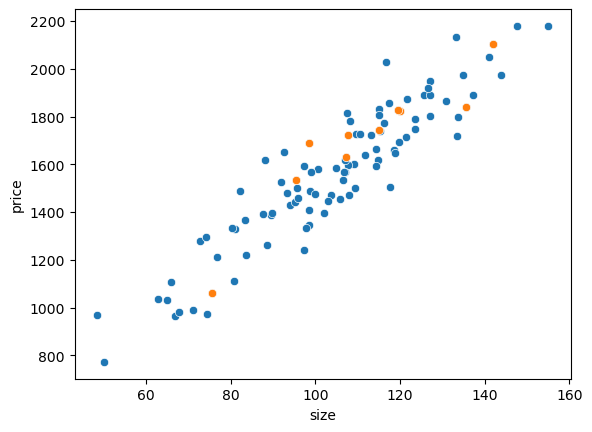

In [9]:
sns.scatterplot(x=X_test["size"], y=y_test, ax=ax)
ax.figure

## Model Training

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
model.predict(pd.DataFrame([100]))

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1507.14302195])

In [14]:
X_all = np.arange(40,160,1)
X_all

array([ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159])

In [15]:
y_pred = model.predict(X_all.reshape(-1,1))
y_pred

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 748.61980512,  761.26185873,  773.90391234,  786.54596596,
        799.18801957,  811.83007319,  824.4721268 ,  837.11418041,
        849.75623403,  862.39828764,  875.04034125,  887.68239487,
        900.32444848,  912.9665021 ,  925.60855571,  938.25060932,
        950.89266294,  963.53471655,  976.17677017,  988.81882378,
       1001.46087739, 1014.10293101, 1026.74498462, 1039.38703823,
       1052.02909185, 1064.67114546, 1077.31319908, 1089.95525269,
       1102.5973063 , 1115.23935992, 1127.88141353, 1140.52346714,
       1153.16552076, 1165.80757437, 1178.44962799, 1191.0916816 ,
       1203.73373521, 1216.37578883, 1229.01784244, 1241.65989606,
       1254.30194967, 1266.94400328, 1279.5860569 , 1292.22811051,
       1304.87016412, 1317.51221774, 1330.15427135, 1342.79632497,
       1355.43837858, 1368.08043219, 1380.72248581, 1393.36453942,
       1406.00659303, 1418.64864665, 1431.29070026, 1443.93275388,
       1456.57480749, 1469.2168611 , 1481.85891472, 1494.50096

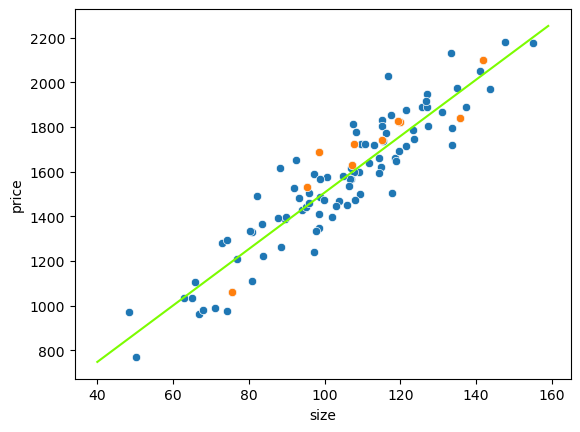

In [16]:
ax.plot(X_all, y_pred, color = "lawngreen")
ax.figure

In [17]:
from sklearn.metrics import root_mean_squared_error as rmse

In [18]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [19]:
print("Train RMSE:", rmse(y_train, y_pred_train))
print("Test RMSE:", rmse(y_test, y_pred_test))

Train RMSE: 110.75296461163144
Test RMSE: 104.91517580090668


# Multivariate Model

In [20]:
flats

,city,floor,size,renovated,balcony.patio,elevator,distance.metro,price
0,Cologne,2,135.588921,Yes,No,No,545.865205,1841.009464
1,Berlin,6,62.803877,Yes,Yes,Yes,575.617524,1036.758496
2,Berlin,6,109.454978,No,No,No,392.897587,1502.613214
3,Munich,1,98.416707,Yes,No,No,506.487093,1346.719862
4,Frankfurt,1,109.179514,Yes,Yes,Yes,768.645354,1599.838934
...,...,...,...,...,...,...,...,...
95,Berlin,4,83.698623,No,Yes,No,845.361532,1222.452091
96,Bochum,2,130.922652,Yes,No,Yes,764.921295,1866.049738
97,Nuremberg,8,106.443521,No,Yes,Yes,595.141191,1536.207455
98,Bochum,1,115.305957,Yes,No,Yes,690.401872,1738.994915


In [21]:
trainset, testset = train_test_split(flats,
                                      test_size = 0.1,
                                      random_state = 300,
                                      shuffle = True)

display(trainset)
display(testset)

,city,floor,size,renovated,balcony.patio,elevator,distance.metro,price
11,Bochum,6,66.881744,No,No,No,699.796890,964.105811
17,Cologne,4,111.759373,Yes,No,No,24.250615,1637.877206
77,Nuremberg,0,83.407736,Yes,No,Yes,64.395160,1366.518601
83,Hamburg,1,107.760673,No,Yes,No,683.486648,1724.652850
72,Bochum,3,50.130774,No,Yes,No,694.795947,772.859545
...,...,...,...,...,...,...,...,...
9,Frankfurt,3,103.657673,No,No,Yes,774.810657,1470.712166
74,Nuremberg,6,143.755626,No,No,No,755.410161,1972.769077
21,Berlin,0,115.108593,Yes,No,No,234.952361,1805.283318
97,Nuremberg,8,106.443521,No,Yes,Yes,595.141191,1536.207455


,city,floor,size,renovated,balcony.patio,elevator,distance.metro,price
39,Frankfurt,4,107.280591,No,Yes,Yes,494.777944,1630.433439
58,Frankfurt,1,87.558670,Yes,No,Yes,100.195195,1392.326766
46,Bochum,4,106.691933,Yes,Yes,Yes,813.860436,1568.483453
67,Frankfurt,1,113.055672,Yes,Yes,No,449.384980,1721.800650
27,Berlin,2,121.546399,Yes,Yes,No,55.522686,1874.357997
29,Frankfurt,1,89.438657,No,Yes,Yes,423.942730,1387.787094
7,Bochum,0,123.615883,No,No,Yes,686.951842,1748.960731
34,Cologne,4,76.818915,Yes,No,Yes,300.657716,1210.695671
32,Frankfurt,6,118.618771,Yes,No,No,644.016180,1661.213176
92,Cologne,1,114.385204,Yes,No,No,495.229469,1594.010134


In [22]:
y_train = trainset["price"]
y_train

11     964.105811
17    1637.877206
77    1366.518601
83    1724.652850
72     772.859545
         ...     
9     1470.712166
74    1972.769077
21    1805.283318
97    1536.207455
81    1475.114360
Name: price, Length: 90, dtype: float64

In [23]:
y_test = testset["price"]
y_test

39    1630.433439
58    1392.326766
46    1568.483453
67    1721.800650
27    1874.357997
29    1387.787094
7     1748.960731
34    1210.695671
32    1661.213176
92    1594.010134
Name: price, dtype: float64

In [24]:
#X_train = trainset.loc[:,["size","distance.metro"]]
X_train = trainset[["size","distance.metro"]]
X_test = testset[["size","distance.metro"]]

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred_train = model.predict(X_train)

In [28]:
print(rmse(y_train, y_pred_train))

87.42165520180046


In [29]:
y_pred_test = model.predict(X_test)

In [30]:
print(rmse(y_test, y_pred_test))

52.38015874483062


In [31]:
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

In [32]:
def rmspe(y_true, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_true - y_pred) / y_true))))

In [33]:
print("RMSE Train:",rmse(y_train, y_pred_train))
print("RMSE Test:",rmse(y_test, y_pred_test))

RMSE Train: 87.42165520180046
RMSE Test: 52.38015874483062


In [34]:
print("MAE Train:",mae(y_train, y_pred_train))
print("MAE Test:",mae(y_test, y_pred_test))

MAE Train: 70.76510117143667
MAE Test: 44.702191336354396


In [35]:
print("MAPE Train:",mape(y_train, y_pred_train))
print("MAPE Test:",mape(y_test, y_pred_test))

MAPE Train: 0.04688491632601763
MAPE Test: 0.029357659389304076


In [36]:
print("RMSPE Train:",rmspe(y_train, y_pred_train))
print("RMSPE Test:",rmspe(y_test, y_pred_test))

RMSPE Train: 0.058816719933958206
RMSPE Test: 0.034993653651704364


# Encoding

## Label Encoding

In [37]:
display(trainset)

,city,floor,size,renovated,balcony.patio,elevator,distance.metro,price
11,Bochum,6,66.881744,No,No,No,699.796890,964.105811
17,Cologne,4,111.759373,Yes,No,No,24.250615,1637.877206
77,Nuremberg,0,83.407736,Yes,No,Yes,64.395160,1366.518601
83,Hamburg,1,107.760673,No,Yes,No,683.486648,1724.652850
72,Bochum,3,50.130774,No,Yes,No,694.795947,772.859545
...,...,...,...,...,...,...,...,...
9,Frankfurt,3,103.657673,No,No,Yes,774.810657,1470.712166
74,Nuremberg,6,143.755626,No,No,No,755.410161,1972.769077
21,Berlin,0,115.108593,Yes,No,No,234.952361,1805.283318
97,Nuremberg,8,106.443521,No,Yes,Yes,595.141191,1536.207455


In [38]:
trainset["renovated"].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
# By hand
trainset["renovated"].replace("No", 0).replace("Yes",1)

11    0
17    1
77    1
83    0
72    0
     ..
9     0
74    0
21    1
97    0
81    1
Name: renovated, Length: 90, dtype: int64

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
label_enc1 = LabelEncoder()

In [42]:
label_enc1.fit(trainset["renovated"])

LabelEncoder()

In [44]:
label_enc1.transform(trainset["renovated"])

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1])

In [45]:
label_enc2 = LabelEncoder()
renovated_enc = label_enc2.fit_transform(trainset["renovated"])
renovated_enc

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1])

In [46]:
renovated_enc = pd.Series(renovated_enc,name = "renovated_enc",index = trainset.index)

In [47]:
X_train = pd.concat([trainset[["size","distance.metro"]],renovated_enc],axis=1)
X_train

,size,distance.metro,renovated_enc
11,66.881744,699.796890,0
17,111.759373,24.250615,1
77,83.407736,64.395160,1
83,107.760673,683.486648,0
72,50.130774,694.795947,0
...,...,...,...
9,103.657673,774.810657,0
74,143.755626,755.410161,0
21,115.108593,234.952361,1
97,106.443521,595.141191,0


In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
model.coef_

array([12.70169672, -0.27763894,  6.16988931])

In [50]:
label_enc_balcony = LabelEncoder()
balcony_enc =label_enc_balcony.fit_transform(trainset["balcony.patio"])
balcony_enc = pd.Series(balcony_enc,name = "balcony_enc",index = trainset.index)
balcony_enc

11    0
17    0
77    0
83    1
72    1
     ..
9     0
74    0
21    0
97    1
81    1
Name: balcony_enc, Length: 90, dtype: int64

In [51]:
X_train = pd.concat([trainset[["size","distance.metro"]],renovated_enc,balcony_enc],axis=1)
X_train

,size,distance.metro,renovated_enc,balcony_enc
11,66.881744,699.796890,0,0
17,111.759373,24.250615,1,0
77,83.407736,64.395160,1,0
83,107.760673,683.486648,0,1
72,50.130774,694.795947,0,1
...,...,...,...,...
9,103.657673,774.810657,0,0
74,143.755626,755.410161,0,0
21,115.108593,234.952361,1,0
97,106.443521,595.141191,0,1


In [52]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([12.99754221, -0.26417685,  4.63401653, 89.38203378])

In [53]:
label_enc_elevator = LabelEncoder()
elevator_enc = label_enc_elevator.fit_transform(trainset["elevator"])
elevator_enc = pd.Series(elevator_enc,name = "elevator_enc",index = trainset.index)
elevator_enc

11    0
17    0
77    1
83    0
72    0
     ..
9     1
74    0
21    0
97    1
81    0
Name: elevator_enc, Length: 90, dtype: int64

In [54]:
X_train = pd.concat([trainset[["size","distance.metro"]],renovated_enc,balcony_enc,elevator_enc],axis=1)
X_train

,size,distance.metro,renovated_enc,balcony_enc,elevator_enc
11,66.881744,699.796890,0,0,0
17,111.759373,24.250615,1,0,0
77,83.407736,64.395160,1,0,1
83,107.760673,683.486648,0,1,0
72,50.130774,694.795947,0,1,0
...,...,...,...,...,...
9,103.657673,774.810657,0,0,1
74,143.755626,755.410161,0,0,0
21,115.108593,234.952361,1,0,0
97,106.443521,595.141191,0,1,1


In [55]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([13.02553933, -0.25892967,  2.37267859, 90.87642514, 36.30086232])

In [56]:
y_pred_train = model.predict(X_train)

In [57]:
print(rmse(y_train, y_pred_train)) 

74.4060102359372


Withoud encoding, the rmse of the model for the train data was 87.42 

## One Hot Encoder

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
oh_enc_city = OneHotEncoder()
city_enc = oh_enc_city.fit_transform(trainset[["city"]]).toarray()

In [68]:
oh_enc_city.get_feature_names_out()

array(['city_Berlin', 'city_Bochum', 'city_Cologne', 'city_Frankfurt',
       'city_Hamburg', 'city_Munich', 'city_Nuremberg'], dtype=object)

In [71]:
city_enc = pd.DataFrame(city_enc,columns=oh_enc_city.get_feature_names_out(),index=trainset.index)
city_enc

,city_Berlin,city_Bochum,city_Cologne,city_Frankfurt,city_Hamburg,city_Munich,city_Nuremberg
11,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,1.0,0.0,0.0,0.0,0.0
77,0.0,0.0,0.0,0.0,0.0,0.0,1.0
83,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21,1.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
X_train = pd.concat([trainset[["size","distance.metro"]],
                     renovated_enc,
                     balcony_enc,
                     elevator_enc,
                     city_enc],
                    axis=1)
X_train

,size,distance.metro,renovated_enc,balcony_enc,elevator_enc,city_Berlin,city_Bochum,city_Cologne,city_Frankfurt,city_Hamburg,city_Munich,city_Nuremberg
11,66.881744,699.796890,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17,111.759373,24.250615,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
77,83.407736,64.395160,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
83,107.760673,683.486648,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72,50.130774,694.795947,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9,103.657673,774.810657,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
74,143.755626,755.410161,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21,115.108593,234.952361,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
97,106.443521,595.141191,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [74]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([ 13.01196008,  -0.24814652,  13.59780318,  87.54706135,
        29.76658221,  17.00247764,  16.74940767, -35.40363586,
       -14.57804032,  33.78090842,  -9.50273694,  -8.04838061])

In [80]:
city_test_enc = oh_enc_city.transform(testset[["city"]]).toarray()
city_test_enc = pd.DataFrame(city_test_enc,columns=oh_enc_city.get_feature_names_out(),index=testset.index)

city_test_enc

,city_Berlin,city_Bochum,city_Cologne,city_Frankfurt,city_Hamburg,city_Munich,city_Nuremberg
39,0.0,0.0,0.0,1.0,0.0,0.0,0.0
58,0.0,0.0,0.0,1.0,0.0,0.0,0.0
46,0.0,1.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32,0.0,0.0,0.0,1.0,0.0,0.0,0.0
92,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [81]:
elevator_test_enc = label_enc_elevator.transform(testset["elevator"])
elevator_test_enc = pd.Series(elevator_test_enc,name = "elevator_enc",index = testset.index)
elevator_test_enc

39    1
58    1
46    1
67    0
27    0
29    1
7     1
34    1
32    0
92    0
Name: elevator_enc, dtype: int64

In [82]:
balcony_test_enc =label_enc_balcony.transform(testset["balcony.patio"])
balcony_test_enc = pd.Series(balcony_test_enc,name = "balcony_enc",index = testset.index)
balcony_test_enc

39    1
58    0
46    1
67    1
27    1
29    1
7     0
34    0
32    0
92    0
Name: balcony_enc, dtype: int64

In [83]:
renovated_test_enc = label_enc2.transform(testset["renovated"])
renovated_test_enc = pd.Series(renovated_test_enc,name = "renovated_enc",index = testset.index)
renovated_test_enc

39    0
58    1
46    1
67    1
27    1
29    0
7     0
34    1
32    1
92    1
Name: renovated_enc, dtype: int64

In [84]:
X_test = pd.concat([testset[["size","distance.metro"]],
                     renovated_test_enc,
                     balcony_test_enc,
                     elevator_test_enc,
                     city_test_enc],
                    axis=1)
X_test

,size,distance.metro,renovated_enc,balcony_enc,elevator_enc,city_Berlin,city_Bochum,city_Cologne,city_Frankfurt,city_Hamburg,city_Munich,city_Nuremberg
39,107.280591,494.777944,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
58,87.558670,100.195195,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
46,106.691933,813.860436,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
67,113.055672,449.384980,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27,121.546399,55.522686,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29,89.438657,423.942730,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,123.615883,686.951842,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34,76.818915,300.657716,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32,118.618771,644.016180,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
92,114.385204,495.229469,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [85]:
model.predict(X_test)

array([1655.98532938, 1423.32955289, 1614.07177443, 1726.2257778 ,
       1966.02284923, 1441.40430047, 1764.63259321, 1213.01461353,
       1662.76848613, 1623.77677977])